### MLBook-1
#### Exercise 4
以IRIS数据集前100个样本为例

* 4.1
实现“自助法”过程，打印出最终选取的“测试集/验证集”和“训练集”的index

In [2]:
from sklearn.datasets import load_iris
import numpy as np


def bootstrap(length):
    """
    Return:
        indexes of train/target datasets.
    """
    train = set()
    for m in range(length):
        train.add(np.random.randint(0, length))
    test = set(range(length)) - train
    return list(train), list(test)

iris = load_iris()
data_x = iris.data[:100]
data_y = iris.target[:100]

idx_train, idx_test = bootstrap(len(data_x))
print("Train: ", idx_train)
print("Test : ", idx_test)

train_x = data_x[idx_train]
train_y = data_y[idx_train]
test_x = data_x[idx_test]
test_y = data_y[idx_test]

Train:  [1, 3, 4, 5, 6, 7, 8, 12, 13, 15, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 46, 48, 49, 50, 51, 53, 58, 59, 60, 61, 65, 68, 71, 72, 73, 75, 76, 77, 78, 79, 80, 84, 85, 87, 89, 90, 91, 92, 93, 94, 96, 97]
Test :  [0, 2, 9, 10, 11, 14, 16, 19, 25, 30, 36, 41, 45, 47, 52, 54, 55, 56, 57, 62, 63, 64, 66, 67, 69, 70, 74, 81, 82, 83, 86, 88, 95, 98, 99]


---
* 4.2
用model = linear_model.SGDClassifier()对上面选取的“训练集”进行训练，计算“测试集/验证集”和“训练集”上的正确率、混淆矩阵、P、R、F1
* 4.3
用model = svm.SVC(gamma=0.001, C=100) 对上面选取的“训练集”进行训练，计算“测试集/验证集”和“训练集”上的正确率、混淆矩阵、P、R、F1
* 4.4
用model=linear_model.LogisticRegression()对上面选取的“训练集”进行训练，可以得到predict_proba_y = model.predict_proba(train_x)[:,1]。计算“测试集/验证集”和“训练集”的AUC值，画出ROC曲线。
* 4.5
用model = svm.SVC(gamma=0.001, C=100)，计算“测试集/验证集”和“训练集”的AUC值，画出ROC曲线。

***** 4.2 Score of SDGClassifier *****
Confusion Matrix: 
 [[14  0]
 [ 1 20]]
Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1: 0.98

***** 4.3 Score of SVC *****
Confusion Matrix: 
 [[14  0]
 [ 0 21]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00

***** 4.4 Score of LogisticRegression *****
Confusion Matrix: 
 [[14  0]
 [ 0 21]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00

AUC: 1.00


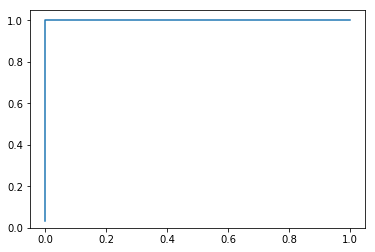

AUC: 1.00


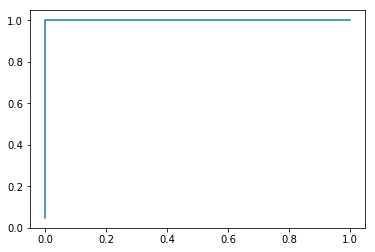

***** 4.5 Score of SVC(gamma=0.001, C=100) *****
Confusion Matrix: 
 [[14  0]
 [ 0 21]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00

AUC: 1.00


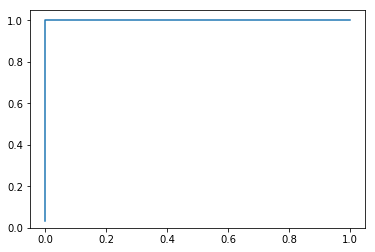

AUC: 1.00


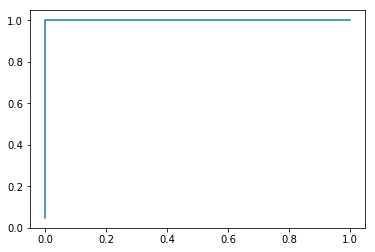

In [18]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm

from matplotlib import pyplot as plt

def draw_roc(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    print("AUC: %.2f" % metrics.auc(fpr, tpr))
    plt.plot(fpr, tpr)
    plt.ylim(ymin=0)
    plt.show()


def score(model, tr_x, tr_y, test_x, test_y):
    model.fit(tr_x, tr_y)
    y_pred = model.predict(test_x)
    y_true = test_y
    accuracy = metrics.accuracy_score(y_true, y_pred)
    cm = metrics.confusion_matrix(y_true, y_pred)
    P = metrics.precision_score(y_true, y_pred)
    R = metrics.recall_score(y_true, y_pred)
    F1 = metrics.f1_score(y_true, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: %.2f" % accuracy)
    print("Precision: %.2f" % P)
    print("Recall: %.2f" % R)
    print("F1: %.2f\n" % F1)
    return model

print("*" * 5 + " 4.2 Score of SDGClassifier " + "*" * 5)
score(linear_model.SGDClassifier(), train_x, train_y, test_x, test_y)

print("*" * 5 + " 4.3 Score of SVC " + "*" * 5)
score(svm.SVC(), train_x, train_y, test_x, test_y)

print("*" * 5 + " 4.4 Score of LogisticRegression " + "*" * 5)
m = score(linear_model.LogisticRegression(), train_x, train_y, test_x, test_y)
print("AUC for train data:")
train_y_score = m.predict_proba(train_x)
draw_roc(train_y, train_y_score[:,1])
print("AUC for train data:")

test_y_score = m.predict_proba(test_x)
draw_roc(test_y, test_y_score[:, 1])

print("*" * 5 + " 4.5 Score of SVC(gamma=0.001, C=100) " + "*" * 5)
m = score(svm.SVC(gamma=0.001, C=100, probability=True), train_x, train_y, test_x, test_y)
train_y_score = m.predict_proba(train_x)
draw_roc(train_y, train_y_score[:, 1])
test_y_score = m.predict_proba(test_x)
draw_roc(test_y, test_y_score[:, 1])